In [2]:
# loading the libraries 
library(randomForest)
library(caret)
library(stats)
library(glmnet)
library(ggplot2)
library(dplyr)
library(rpart)
library(reshape2)
library(treemap)
library(xgboost)
options(warn = -1)
library(corrplot)
library(gbm)
df <- read.csv("/Users/sheebamoghal/Desktop/DSAN_5300/5300-project-bangladesh_migration/cleaned_data/new-cleaned_data-01.csv")
df1=df

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.

Loading required package: ggplot2




Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin


Loading required package: lattice

Loading required package: Matrix

Loaded glmnet 4.1-7


Attaching package: 'dplyr'


The following object is masked from 'package:randomForest':

    combine


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'xgboost'


The following object is masked from 'package:dplyr':

    slice


corrplot 0.92 loaded

Loaded gbm 2.1.8.1



In [3]:
dim(df1)

[1] 4383   92

In [4]:
summary(df1)

  H_IDNUMBER             HHNO            BEM_ID           DIST      
 Length:4383        Min.   :   1.0   Min.   :201.0   Min.   : 1.00  
 Class :character   1st Qu.: 114.0   1st Qu.:206.0   1st Qu.: 9.00  
 Mode  :character   Median : 239.0   Median :210.0   Median :42.00  
                    Mean   : 518.5   Mean   :210.5   Mean   :41.29  
                    3rd Qu.: 581.0   3rd Qu.:215.0   3rd Qu.:57.00  
                    Max.   :4638.0   Max.   :220.0   Max.   :86.00  
                                                     NA's   :1      
      TMEM             Q1            G1_4S1        G1_5A1S1     
 Min.   : 1.00   Min.   :1.000   Min.   :1940   Min.   :   1.0  
 1st Qu.: 4.00   1st Qu.:1.000   1st Qu.:1995   1st Qu.:  26.0  
 Median : 5.00   Median :1.000   Median :2003   Median :  26.0  
 Mean   : 5.81   Mean   :1.199   Mean   :2200   Mean   : 123.4  
 3rd Qu.: 7.00   3rd Qu.:1.000   3rd Qu.:2011   3rd Qu.:  41.0  
 Max.   :12.00   Max.   :7.000   Max.   :9999   Max.   :99

In [5]:
sum(is.na(df1))

[1] 102762

Due to the amount of columns in the dataframe, feature selection is suggested to remove the columns that are not significant for the analysis.

## Feature Selection and Variable Exploration

In [6]:
# Seperate Numerical and Categorical Data 
numeric_cols = sapply(df1, is.numeric)
categorical_cols = !numeric_cols
# Ensure categorical columns are factors 
df1[categorical_cols] = lapply(df1[categorical_cols], factor)

# Check any missing values
df1[is.na(df1)] = -999 # adding a number instead to offset the missing values
View(df1)

# Feature selection for Numerical Feature

# L1 (Lasso) Regularization 
x = as.matrix(df1[, numeric_cols])
y = df1$Q1_1
lasso_model = cv.glmnet(x, y, alpha = 1, nfolds =10)
coef_lasso = coef(lasso_model, s = "lambda.min")
numeric_lasso = rownames(coef_lasso)[coef_lasso[,1] != 0]
print(numeric_lasso)



H_IDNUMBER,HHNO,BEM_ID,DIST,TMEM,Q1,G1_4S1,G1_5A1S1,G1_6S1,P1A_2A,...,P12_1,P12_2,P12_3,Q1_1,Q1_3,Q1_5,Q1_6,Q1_11,Q1_12,Q1_13
<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10_164_3169,3169,203,86,5,1,-999,-999,-999,20,...,0,-999.0,-999,9,9,9,9,9,9,9
11_164_1386,1386,203,86,11,1,-999,-999,-999,6,...,1998,91.4,1,3,1,1,2,3,1,1
11_164_1410,1410,203,86,12,1,1999,26,2,24,...,2004,91.0,3,2,1,1,2,1,1,1
11_164_1433,1433,203,86,8,1,1995,33,1,10,...,2004,97.0,2,9,9,9,9,9,9,9
11_164_1456,1456,203,86,4,1,2011,59,1,6,...,0,-999.0,-999,2,1,1,2,3,1,1
11_164_1480,1480,203,86,4,1,2002,26,1,10,...,0,-999.0,-999,2,2,1,2,3,1,1
11_164_1503,1503,203,86,5,1,2008,26,1,20,...,2004,45.0,1,1,2,2,1,3,2,2
11_164_1526,1526,203,86,5,1,-999,-999,-999,12,...,0,-999.0,-999,2,2,1,2,3,1,2
11_164_1550,1550,203,86,6,1,2012,26,1,6,...,0,-999.0,-999,9,9,9,9,9,9,9


 [1] "(Intercept)" "TMEM"        "P5_1"        "J2_1"        "J2_14"      
 [6] "J1AB"        "T2"          "Q1_1"        "Q1_3"        "Q1_5"       
[11] "Q1_13"      


In [7]:
# Feature Selection for Catgorical Features 

# Chi-Square test 
chi_squared = chisq.test(df1[, categorical_cols], df1$Q1_1)
p_value = chi_squared$p.value
significant_categorical = names(df1)[categorical_cols][p_value < 0.05]
print(significant_categorical)

character(0)


Selected Features found using Q1_1 as the target Y variable 
1. Q1_1: Perceived Environmental Change: Temperature



1. TMEM: Total household member
2. P5_1: Land Holdings: Does household cultivate aquaculture?
3. J2_1: House Services: Light
4. J2_14: House Services: Generator
5. J1AB: Energy: Used by household? - Fire wood
6. T2: Government/Aid: Local government officials are effective?
7. Q1_1: Perceived Environmental Change: Temperature
8. Q1_3: Perceived Environmental Change: Rainfall during other seasons
9. Q1_5: Perceived Environmental Change: Severity of floods
10. Q1_13: Perceived Environmental Change: Abundance of fish in water



In [8]:
# Combine selected features

selected_features = c(numeric_lasso, significant_categorical)
print(selected_features)


library(dplyr)
df1 = df1 %>% select(TMEM, P5_1, J2_1, J2_14, J1AB, T2, Q1_1, Q1_3, Q1_5, Q1_13)
df1[df1 == -999] = 0.00001 # added 0.01 which is a very small weight to ensure missing values are catered to and we do not need to drop any columns or impute.

 [1] "(Intercept)" "TMEM"        "P5_1"        "J2_1"        "J2_14"      
 [6] "J1AB"        "T2"          "Q1_1"        "Q1_3"        "Q1_5"       
[11] "Q1_13"      


## Variable Exploration

In [9]:
# final variable df
head(df1)

,TMEM,P5_1,J2_1,J2_14,J1AB,T2,Q1_1,Q1_3,Q1_5,Q1_13
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,2,1,2,1,9,9,9,9,9
2,11,2,1,2,1,3,3,1,1,1
3,12,2,1,2,1,2,2,1,1,1
4,8,2,1,2,1,9,9,9,9,9
5,4,2,1,2,1,1,2,1,1,1
6,4,2,1,2,1,2,2,2,1,1


In [10]:
colnames(df1) # going to use these specific columns

[1] "TMEM"  "P5_1"  "J2_1"  "J2_14" "J1AB"  "T2"    "Q1_1"  "Q1_3"  "Q1_5" 
[10] "Q1_13"

In [11]:
# since these are the feature selected columns, they are all renamed
df <- df1 %>% select(TMEM, P5_1, J2_1, J2_14, J1AB, T2, Q1_1, Q1_3, Q1_5, Q1_13)
df[is.na(df)] <- 0.01

df <- df %>%
  rename(
    Total_Household = TMEM,
    Land_Hold_Aquaculture = P5_1,
    Has_Light = J2_1,
    Has_Generator = J2_14,
    Use_Firewood = J1AB,
    Government_Effectiveness = T2,
    Temperature_Change = Q1_1,
    Rainfall_Change = Q1_3,
    Flood_Change = Q1_5,
    Fish_in_Water_Change = Q1_13
  )

In [12]:
# Tree plot before and after feature selection

No id variables; using all as measure variables

No id variables; using all as measure variables



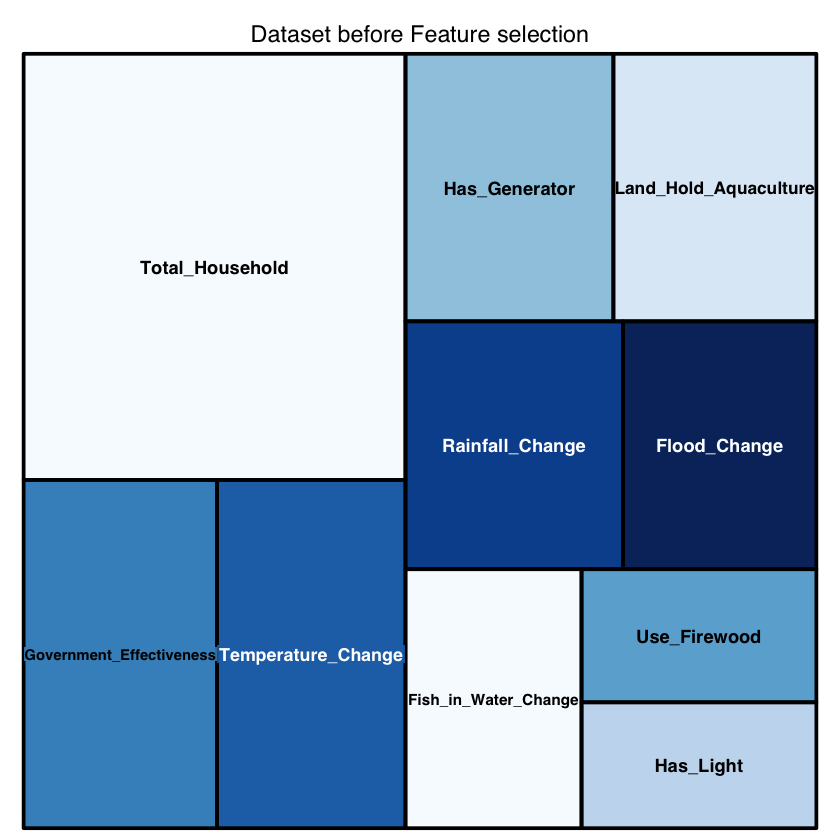

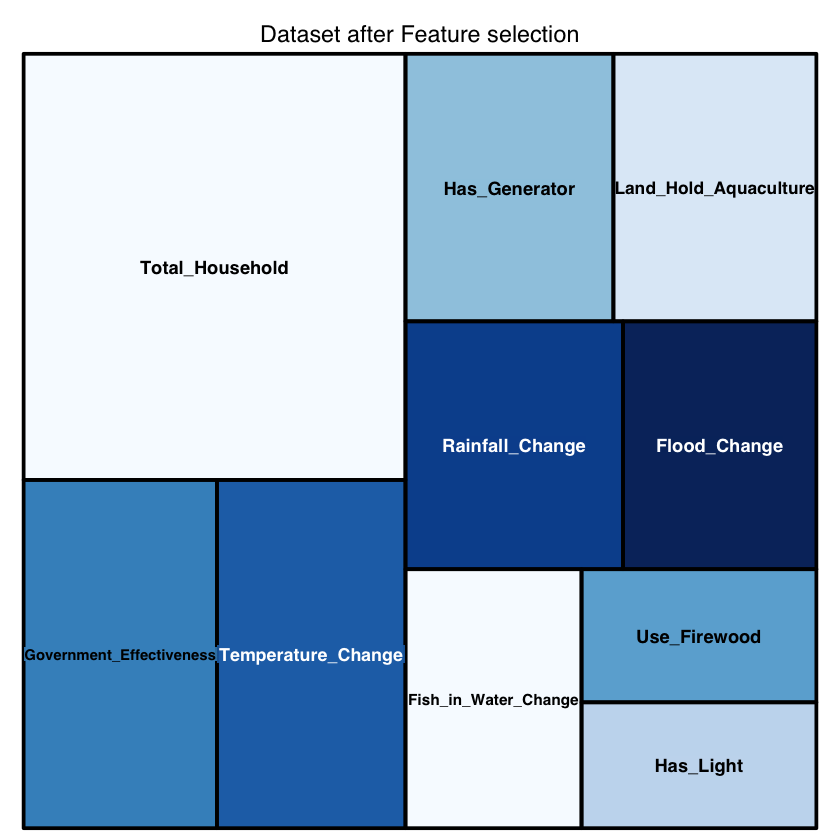

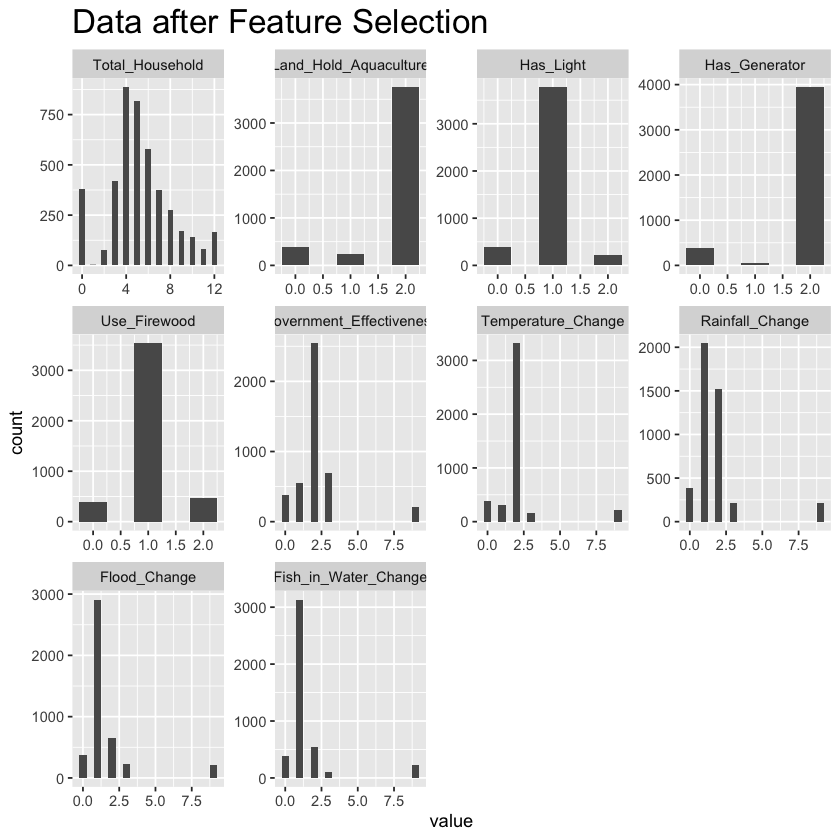

In [13]:
df_plot <- melt(df)
treemap(df_plot, index = c("variable", "variable"), vSize = "value", title = "Dataset before Feature selection",  palette = "Blues")

df_plot <- melt(df)
treemap(df_plot, index = c("variable", "variable"), vSize = "value", title = "Dataset after Feature selection",  palette = "Blues")

ggplot(df_plot, aes(value)) +
  geom_histogram(binwidth = 0.5) +
  facet_wrap(~ variable, scales = "free") +
  labs(title = "Data after Feature Selection") + theme(plot.title = element_text(size = 20))

## Exploratory Data Analysis

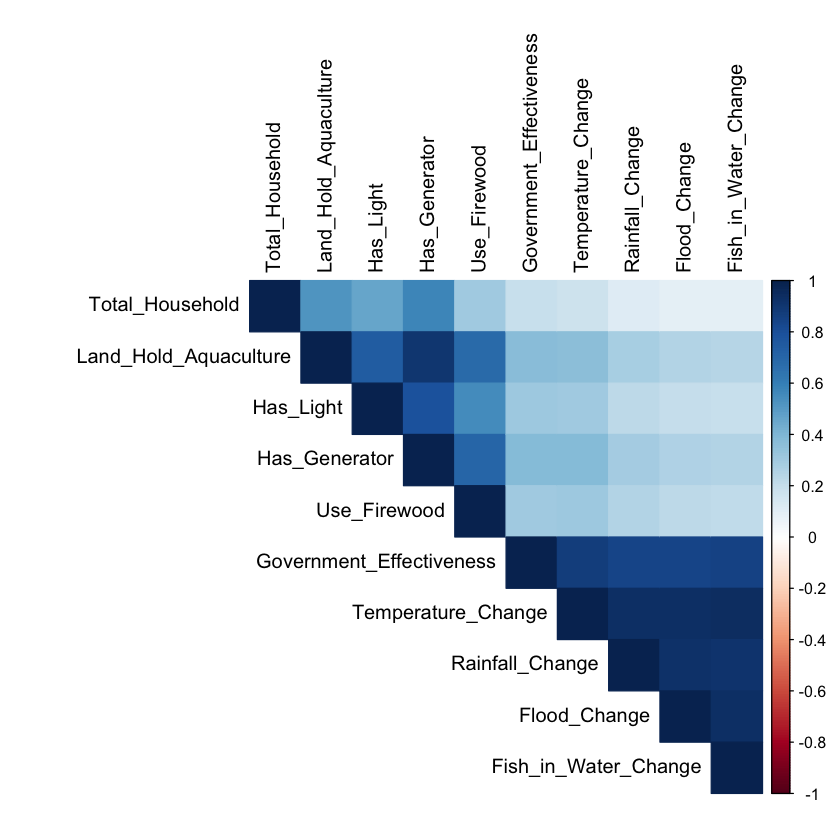

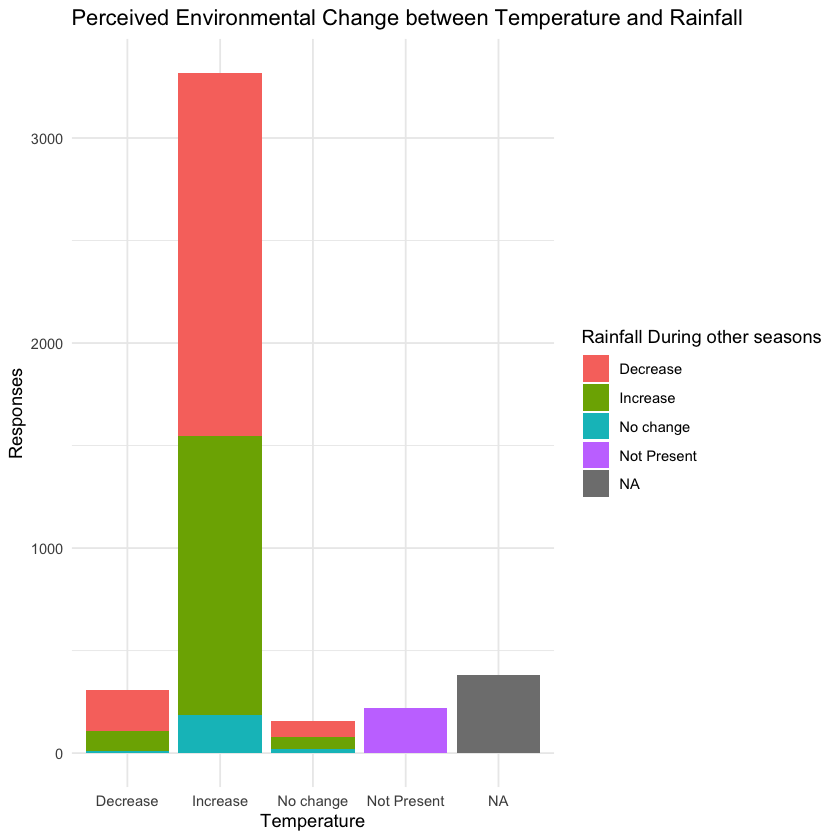

In [14]:
# EDA analysis for feature selection 
corr_matrix <- cor(df[, c("Total_Household", "Land_Hold_Aquaculture", "Has_Light", "Has_Generator", "Use_Firewood", "Government_Effectiveness", "Temperature_Change", "Rainfall_Change", "Flood_Change", "Fish_in_Water_Change")])

corrplot(corr_matrix, method = "color", type = "upper", tl.col = "black")

filtered_df <- df %>%
  filter(Temperature_Change != 0.01 & Rainfall_Change != 0.01)

Q1_1_labels <- c("Decrease", "Increase", "No change", "Not Present")

# Convert Q1_1 to a factor with custom labels
filtered_df$Temperature_Change <- factor(filtered_df$Temperature_Change, levels = c(1,2,3,9) , labels = Q1_1_labels)

filtered_df$Rainfall_Change <- factor(filtered_df$Rainfall_Change, levels = c(1,2,3,9) , labels = Q1_1_labels)

ggplot(filtered_df, aes(x = factor(Temperature_Change), fill = factor(Rainfall_Change))) + geom_bar(position = "stack") + labs(x = "Temperature", y = "Responses", title = "Perceived Environmental Change between Temperature and Rainfall") + scale_fill_discrete(name = "Rainfall During other seasons") + theme_minimal()

In [15]:
colnames(df)

[1] "Total_Household"          "Land_Hold_Aquaculture"   
 [3] "Has_Light"                "Has_Generator"           
 [5] "Use_Firewood"             "Government_Effectiveness"
 [7] "Temperature_Change"       "Rainfall_Change"         
 [9] "Flood_Change"             "Fish_in_Water_Change"

In [16]:
colnames(df1)

[1] "TMEM"  "P5_1"  "J2_1"  "J2_14" "J1AB"  "T2"    "Q1_1"  "Q1_3"  "Q1_5" 
[10] "Q1_13"

## Modeling 

In [17]:
# user defined function for metrics
calculate_metrics_with_criteria = function(test_y, test_pred, model) {
  # Compute RMSE, MAE, and R_squared
  rmse = sqrt(mean((test_y - test_pred)^2))
  mae = mean(abs(test_y - test_pred))
  r_squared = cor(test_y, test_pred)^2
  # Extract the coefficients from the model
  coef_values <- coef(model) 
  # Calculate the effective degrees of freedom
  df <- sum(coef_values != 0)
  # Number of observations
  n <- length(test_y)
  # Residuals
  residuals <- test_y - test_pred
  # Residual sum of squares
  RSS <- sum(residuals^2)
  # Log-likelihood
  log_likelihood <- -0.5 * (n * log(2 * pi) + n * log(RSS / n) + n)
  # AIC and BIC
  AIC <- -2 * log_likelihood + 2 * df
  BIC <- -2 * log_likelihood + df * log(n)
  # Return metrics along with AIC and BIC
  return(list(RMSE = rmse, MAE = mae, R_squared = r_squared, AIC = AIC, BIC = BIC))
}


### Baseline Linear Regression 

In [18]:
set.seed(4848)
y = df$Temperature_Change
x = df[, c('Total_Household', 'Land_Hold_Aquaculture', 'Has_Light', 'Has_Generator', 'Use_Firewood', 'Government_Effectiveness', 'Rainfall_Change', 'Flood_Change', 'Fish_in_Water_Change')]
train_index = createDataPartition(y, p = 0.8, list = FALSE)
train_x = x[train_index, ]
train_y = y[train_index]
test_x = x[-train_index, ]
test_y = y[-train_index]

In [19]:
lm_model = lm(train_y ~ ., data = train_x)
lm_pred = predict(lm_model, newdata = test_x)
lm_metrics = calculate_metrics(test_y, lm_pred)
summary(lm_model)

ERROR: Error in calculate_metrics(test_y, lm_pred): could not find function "calculate_metrics"


### Linear Regression

In [ ]:
lm_model1 = lm(train_y ~ Has_Generator + Government_Effectiveness + Rainfall_Change + Flood_Change + Fish_in_Water_Change , data = train_x)
lm_pred1 = predict(lm_model1, newdata = test_x)
lm_metrics1 = calculate_metrics(test_y, lm_pred)
summary(lm_model1)


Call:
lm(formula = train_y ~ Has_Generator + Government_Effectiveness + 
    Rainfall_Change + Flood_Change + Fish_in_Water_Change, data = train_x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.95195 -0.18376  0.05094  0.28716  1.38814 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               0.01537    0.02365    0.65    0.516    
Has_Generator             0.34511    0.01373   25.13   <2e-16 ***
Government_Effectiveness  0.10099    0.00897   11.26   <2e-16 ***
Rainfall_Change           0.23622    0.01157   20.41   <2e-16 ***
Flood_Change              0.23546    0.01212   19.43   <2e-16 ***
Fish_in_Water_Change      0.33360    0.01208   27.63   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4173 on 3501 degrees of freedom
Multiple R-squared:  0.9377,	Adjusted R-squared:  0.9377 
F-statistic: 1.055e+04 on 5 and 3501 DF,  p-value: < 2.2e-16


## Ridge Regression 

In [ ]:
ridge_model = cv.glmnet(as.matrix(train_x), train_y, alpha = 0)
ridge_pred = predict(ridge_model, newx = as.matrix(test_x))
ridge_metrics = calculate_metrics(test_y, ridge_pred)

## Lasso Regression 

In [ ]:
lasso_model = cv.glmnet(as.matrix(train_x), train_y, alpha = 1)
lasso_pred = predict(lasso_model, newx = as.matrix(test_x))
lasso_metrics = calculate_metrics(test_y, lasso_pred)

## Elastic Net Regression 

In [ ]:
enet_model = cv.glmnet(as.matrix(train_x), train_y, alpha = 0.5)
enet_pred = predict(enet_model, newx = as.matrix(test_x))
enet_metrics = calculate_metrics(test_y, enet_pred)

## GLM Model 

In [ ]:
glm_model = train(
  x = train_x,
  y = train_y,
  method = "glm", 
  trControl = trainControl(method = "cv", number = 5)
)
glm_pred = predict(glm_model, newdata = test_x)
glm_metrics = calculate_metrics(test_y, glm_pred)
print(glm_metrics)

$RMSE
[1] 0.3895755

$MAE
[1] 0.2686685

$R_squared
[1] 0.9532795



## Decision Tree (Base Model)

In [ ]:
dt_model = rpart(train_y ~ ., data = train_x)
dt_pred = predict(dt_model, newdata = test_x)
dt_metrics = calculate_metrics(test_y, dt_pred)

## Decision Tree (Hyperparameter Tuned)

In [ ]:
# grid
grid = expand.grid(cp = seq(0.01, 0.5, 0.01))

dt_tuned = train(
  x = train_x,
  y = train_y,
  method = "rpart",
  trControl = trainControl(method = "cv", number = 5),
  tuneGrid = grid
)

print(dt_tuned$bestTune)
dt_tuned_pred = predict(dt_tuned, newdata = test_x)
dt_tuned_metrics = calculate_metrics(test_y, dt_tuned_pred)
print("Decision Tree (Hyperparameter Tuned using GridSearchCV)")
print(dt_tuned_metrics)

    cp
10 0.1
[1] "Decision Tree (Hyperparameter Tuned using GridSearchCV)"
$RMSE
[1] 0.3153748

$MAE
[1] 0.1277539

$R_squared
[1] 0.9693985



## Random Forest (Base)

In [ ]:
rf_model = randomForest(train_y ~ ., data = train_x)
rf_pred = predict(rf_model, newdata = test_x)
rf_metrics = calculate_metrics(test_y, rf_pred)

## Random Forest (Hyperparameter Tuning)

In [ ]:
# tuning 
grid = expand.grid(mtry = c(2, 3, 4))  

rf_tuned = train(
  x = train_x,
  y = train_y,
  method = "rf",
  trControl = trainControl(method = "cv", number = 2),
  tuneGrid = grid
)

print(rf_tuned$bestTune)
rf_tuned_pred = predict(rf_tuned, newdata = test_x)
rf_tuned_metrics = calculate_metrics(test_y, rf_tuned_pred)
print("Random Forest (Hyperparameter Tuned using GridSearchCV)")
print(rf_tuned_metrics)

  mtry
1    2
[1] "Random Forest (Hyperparameter Tuned using GridSearchCV)"
$RMSE
[1] 0.3173159

$MAE
[1] 0.1348095

$R_squared
[1] 0.9690337



## Gradient Boost 

In [ ]:
gbm_model = gbm(
  formula = train_y ~ .,
  data = train_x,
  distribution = "gaussian",  # i chose gaussian
  n.trees = 1000,  
  interaction.depth = 4,  
  shrinkage = 0.01,  # this is learning rate
  bag.fraction = 0.5,  
  cv.folds = 5  #cv
)


gbm_pred = predict(gbm_model, newdata = test_x)
gbm_metrics = calculate_metrics(test_y, gbm_pred)
print("Gradient Boosting")
print(gbm_metrics)

Using 568 trees...




[1] "Gradient Boosting"
$RMSE
[1] 0.3175424

$MAE
[1] 0.1365476

$R_squared
[1] 0.9690337



## XG Boost 

In [ ]:
xgb_model = xgboost(
  data = as.matrix(train_x),
  label = train_y,
  nrounds = 100,  # n boosting rounds 
  objective = "reg:squarederror",  # obj fn
  eta = 0.3,  # lr
  max_depth = 6,  
  subsample = 0.8,  
  colsample_bytree = 0.8)

xgb_pred = predict(xgb_model, as.matrix(test_x))
xgb_metrics = calculate_metrics(test_y, xgb_pred)

print("XGBoost")
print(xgb_metrics)

[1]	train-rmse:1.657084 
[2]	train-rmse:1.184855 
[3]	train-rmse:0.862053 
[4]	train-rmse:0.646660 
[5]	train-rmse:0.508317 
[6]	train-rmse:0.422752 
[7]	train-rmse:0.374069 
[8]	train-rmse:0.347146 
[9]	train-rmse:0.332867 
[10]	train-rmse:0.325370 
[11]	train-rmse:0.321226 
[12]	train-rmse:0.318813 
[13]	train-rmse:0.317328 
[14]	train-rmse:0.316504 
[15]	train-rmse:0.315107 
[16]	train-rmse:0.314427 
[17]	train-rmse:0.313880 
[18]	train-rmse:0.312465 
[19]	train-rmse:0.311765 
[20]	train-rmse:0.310715 
[21]	train-rmse:0.309827 
[22]	train-rmse:0.308664 
[23]	train-rmse:0.307996 
[24]	train-rmse:0.307502 
[25]	train-rmse:0.306941 
[26]	train-rmse:0.306210 
[27]	train-rmse:0.305731 
[28]	train-rmse:0.305028 
[29]	train-rmse:0.304109 
[30]	train-rmse:0.303534 
[31]	train-rmse:0.303164 
[32]	train-rmse:0.302838 
[33]	train-rmse:0.302780 
[34]	train-rmse:0.302182 
[35]	train-rmse:0.301899 
[36]	train-rmse:0.301688 
[37]	train-rmse:0.301234 
[38]	train-rmse:0.300917 
[39]	train-rmse:0.300

## Stacked Model (Using GLM and Random Forest)

In [ ]:
model1 = train(
  x = train_x,
  y = train_y,
  method = "glm", # using glm
  trControl = trainControl(method = "cv", number = 5)
)

model2 = train(
  x = train_x,
  y = train_y,
  method = "rf",  # random forest
  trControl = trainControl(method = "cv", number = 5)
)

pred_model1 = predict(model1, newdata = test_x)
pred_model2 = predict(model2, newdata = test_x)

stacked_data = data.frame(pred_model1, pred_model2)

stacked_model = lm(test_y ~ ., data = stacked_data)
stacked_pred = predict(stacked_model, newdata = stacked_data)
stacked_metrics = calculate_metrics(test_y, stacked_pred)
print("Stacked Model")
print(stacked_metrics) 

[1] "Stacked Model"
$RMSE
[1] 0.3151155

$MAE
[1] 0.1506938

$R_squared
[1] 0.9693966



## Performance Metrics and Additional Metric Exploration 

Although we did use AIC and BIC to compute, it seem like a good option as AIC and BIC are better indicators for linear and logistic regression, and not for regression with regularisation techniques or for the non-parametric models (like Bagging and Boosting techniques).

In [ ]:
models <- c("Base Linear Regression (OLS)", "Linear Regression", "Ridge Regression", "Lasso Regression", 
            "Elastic Net Regression", "Decision Tree (Base)", "Random Forest (Base)", 
            "Decision Tree (Hyperparameter Tuned)", "Random Forest (Hyperparameter Tuned)",
            "Gradient Boosting", "XGBoost", "Stacked Model")
predictions <- list(
  lm_pred, lm_pred1, ridge_pred, lasso_pred, enet_pred, dt_pred, rf_pred, dt_tuned_pred,
  rf_tuned_pred, gbm_pred, xgb_pred, stacked_pred
)
list_of_models <- list(
  lm_model, lm_model1, ridge_model, lasso_model, enet_model, dt_model, rf_model, dt_tuned,
  rf_tuned, gbm_model, xgb_model, stacked_model
)

metrics_table <- data.frame(
  Model = models,
  RMSE = numeric(length(models)),
  MAE = numeric(length(models)),
  R_squared = numeric(length(models)),
  AIC = numeric(length(models)),
  BIC = numeric(length(models))
)
calculate_and_fill_metrics <- function(test_y, test_pred, model, test_x) {
  rmse <- sqrt(mean((test_y - test_pred)^2))
  mae <- mean(abs(test_y - test_pred))
  r_squared <- cor(test_y, test_pred)^2
  coef_values <- coef(model)
  df <- sum(coef_values != 0)
  n <- length(test_y)
  residuals <- test_y - test_pred
  RSS <- sum(residuals^2)
  log_likelihood <- -0.5 * (n * log(2 * pi) + n * log(RSS / n) + n)
  AIC <- -2 * log_likelihood + 2 * df
  BIC <- -2 * log_likelihood + df * log(n)
  return(c(RMSE = rmse, MAE = mae, R_squared = r_squared, AIC = AIC, BIC = BIC))
}

for (i in 1:length(models)) {
  metrics <- calculate_and_fill_metrics(test_y, predictions[[i]], model = list_of_models[[i]], test_x = test_x)
  metrics_table[i, 2:6] <- metrics
}
print(metrics_table)



                                  Model      RMSE       MAE R_squared      AIC
1          Base Linear Regression (OLS) 0.3895755 0.2686685 0.9532795 854.3743
2                     Linear Regression 0.3898945 0.2690535 0.9532027 847.8081
3                      Ridge Regression 0.4079565 0.2838058 0.9508832 935.1463
4                      Lasso Regression 0.4045504 0.3021430 0.9524895 906.4574
5                Elastic Net Regression 0.4063310 0.3002518 0.9521842 922.1515
6                  Decision Tree (Base) 0.3153748 0.1277539 0.9693985 464.1838
7                  Random Forest (Base) 0.3203276 0.1421676 0.9684303 491.4840
8  Decision Tree (Hyperparameter Tuned) 0.3153748 0.1277539 0.9693985 464.1838
9  Random Forest (Hyperparameter Tuned) 0.3173159 0.1348095 0.9690337 474.9339
10                    Gradient Boosting 0.3175424 0.1365476 0.9690337 476.1840
11                              XGBoost 0.3346518 0.1637444 0.9655073 568.1277
12                        Stacked Model 0.3151155 0.

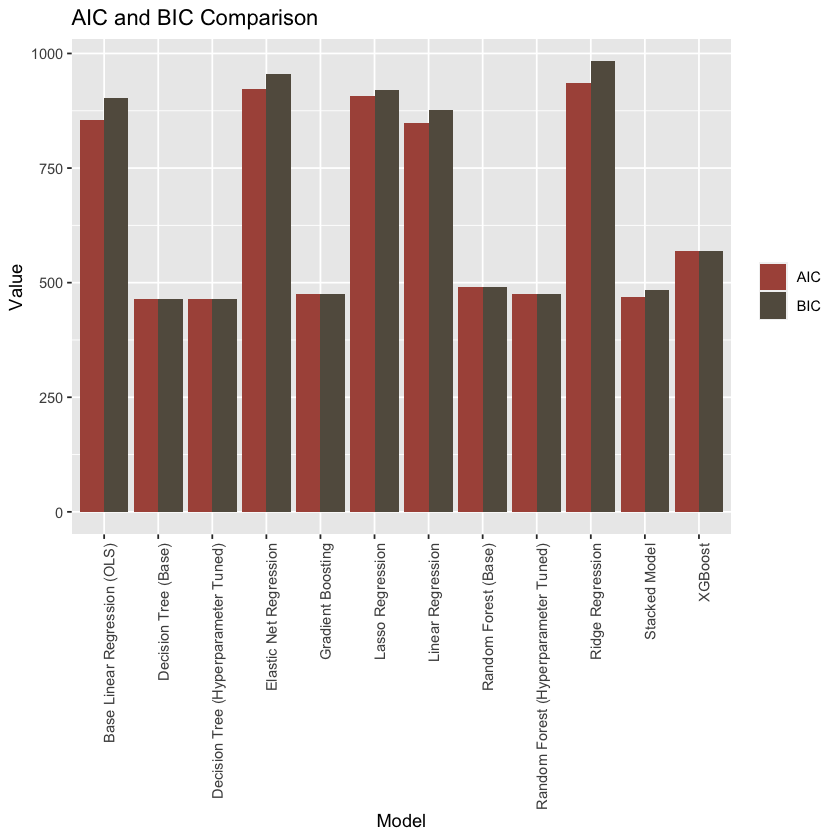

In [ ]:
library(ggplot2)

# Melt the metrics table to long format for plotting
library(reshape2)
metrics_table_long <- melt(metrics_table, id.vars = "Model", measure.vars = c("AIC", "BIC"))

# Plot AIC and BIC
ggplot(metrics_table_long, aes(x = Model, y = value, fill = variable)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "AIC and BIC Comparison",
       y = "Value",
       x = "Model") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_fill_manual(values = c("AIC" = "#AC5448", "BIC" = "#635B4E")) +
  theme(legend.title = element_blank())


In [ ]:
# Data frame based on the models created with RMSE, MAE, R_squared based on Y target variable Q1_1
# Tagret Variable: 
data <- data.frame(
  Model = c("Base Linear Regression (OLS)", "Ridge Regression", "Lasso Regression",
            "Elastic Net Regression", "Decision Tree (Base)", "Random Forest (Base)",
            "Decision Tree (Hyperparameter Tuned)", "Random Forest (Hyperparameter Tuned)",
            "Gradient Boosting", "XGBoost", "Stacked Model"),
  RMSE = c(0.3980601, 0.4172933, 0.4078301, 0.4064160, 0.3181162, 0.3253209,
           0.3181162, 0.3198989, 0.3203697, 0.3480966, 0.3189486),
  MAE = c(0.2771514, 0.2939489, 0.3019748, 0.2967684, 0.1313860, 0.1503552,
          0.1313860, 0.1409187, 0.1422168, 0.1797902, 0.1461091),
  R_squared = c(0.9470258, 0.9439985, 0.9462018, 0.9461558, 0.9661455, 0.9646005,
                0.9661455, 0.9657753, 0.9656845, 0.9595205, 0.9659662)
)
data_melted <- melt(data, id.vars = "Model")
data_melted1 <- data_melted[data_melted$variable != "R_squared", ]

# Determine the best model in the analysis
best_model <- data[which.min(data$RMSE), ]
best_model <- rbind(best_model, data[which.min(data$MAE), ])
best_model <- rbind(best_model, data[which.max(data$R_squared), ])

best_model <- unique(best_model)
best_model

,Model,RMSE,MAE,R_squared
,<chr>,<dbl>,<dbl>,<dbl>
5,Decision Tree (Base),0.3181162,0.131386,0.9661455


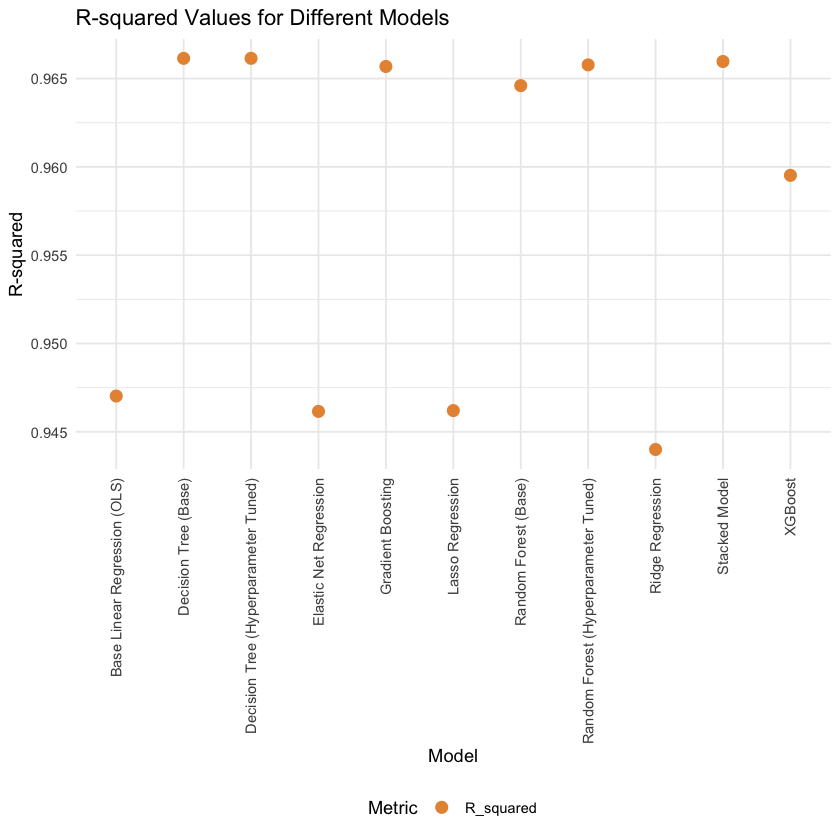

In [ ]:
ggplot(data_melted[data_melted$variable == "R_squared", ], aes(x = Model, y = value, color = variable, group = variable)) +
  geom_point(size= 3, fill = "#635B4E") + scale_color_manual(values = c("#E7943F")) +
  labs(
    x = "Model",
    y = "R-squared",
    title = "R-squared Values for Different Models",
    color = "Metric"
  ) +
  theme_minimal() +
  theme(legend.position = "bottom", axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))

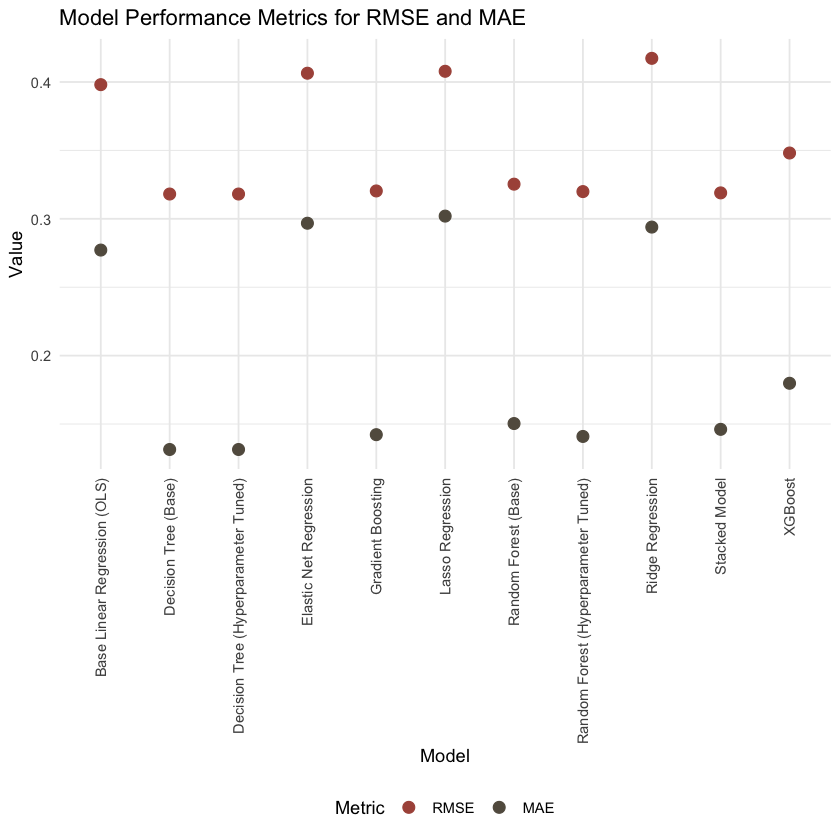

In [ ]:
ggplot(data_melted1, aes(x = Model, y = value, color = variable, group = variable)) +
  geom_point(size = 3) +  scale_color_manual(values = c("#AC5448", "#635B4E")) +
  labs(
    x = "Model",
    y = "Value",
    title = "Model Performance Metrics for RMSE and MAE",
    color = "Metric"
  ) +
  theme_minimal()  +
  theme(
    legend.position = "bottom",
    axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5), 
  )

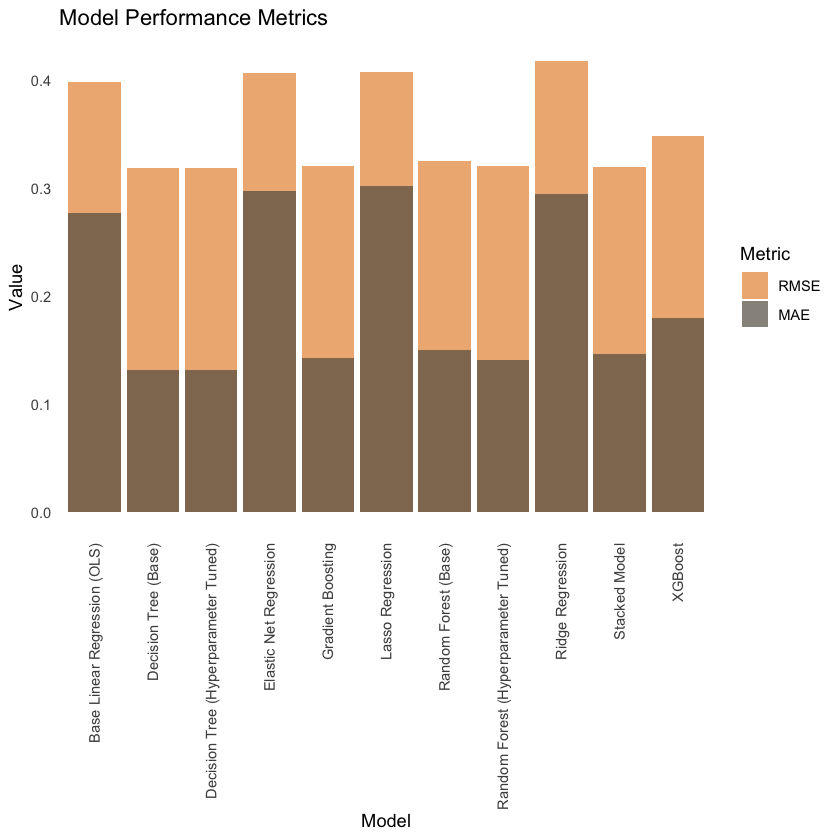

In [ ]:
ggplot(data_melted1, aes(x = Model, y = value, fill = variable)) +
  geom_bar(stat = "identity", position = "identity", alpha = 0.7, color = NA) +
  labs(
    x = "Model",
    y = "Value",
    title = "Model Performance Metrics",
    fill = "Metric"
  ) +
  scale_fill_manual(values = c("RMSE" = "#E7943F", "MAE" = "#635B4E")) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5), 
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
  ) 

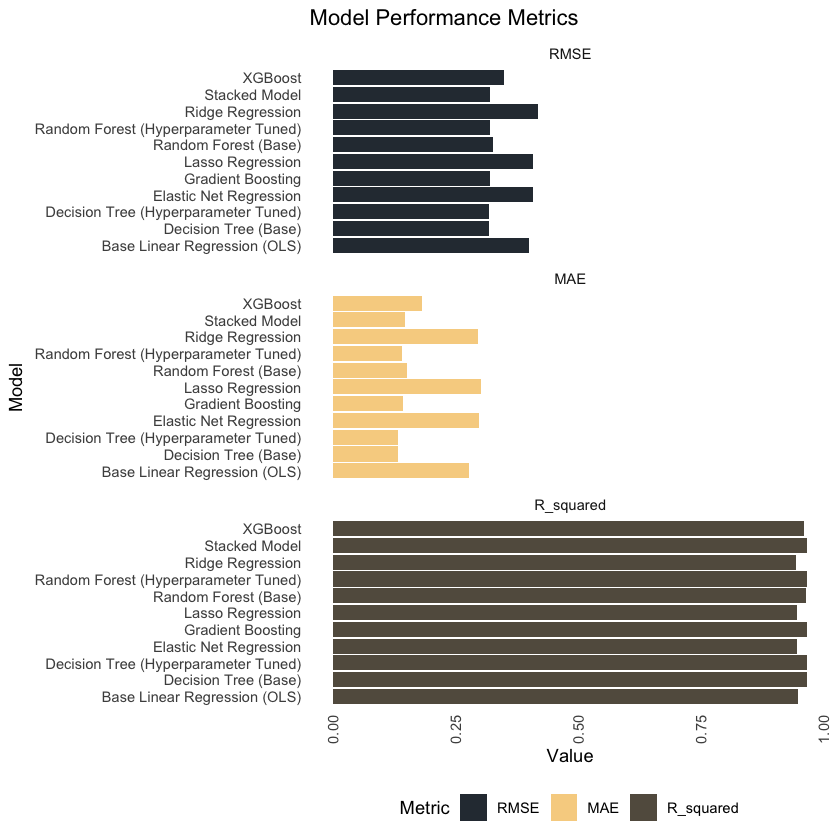

In [ ]:
ggplot(data_melted, aes(x = Model, y = value, fill = variable)) +
  geom_bar(stat = "identity", position = "dodge") +
  coord_flip() + scale_fill_manual(values = c("#2D3740", "#F7D290", "#635B4E")) +
  facet_wrap(~ variable, scales = "free_y", ncol = 1) +
  labs(
    x = "Model",
    y = "Value",
    title = "Model Performance Metrics",
    fill = "Metric"
  ) +
  theme_minimal() +
  theme(
    legend.position = "bottom",
    axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5), 
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_line(color = "white"),   
  ) 

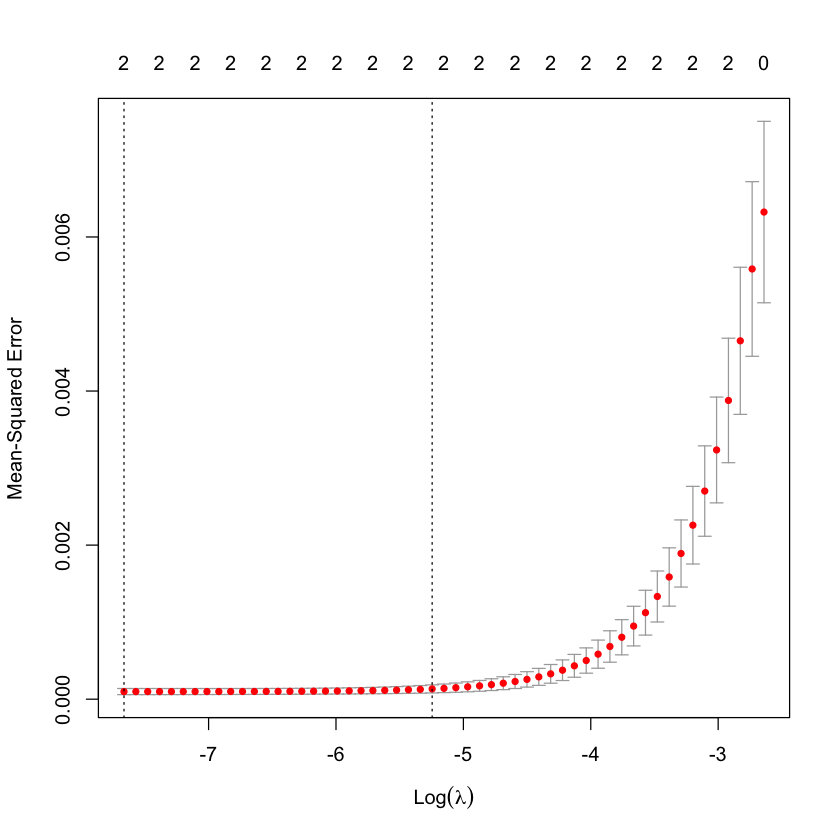

In [ ]:
X <- data.matrix(data[, c('RMSE', "R_squared")])
y <- data$MAE

lasso_model <- cv.glmnet(X, y, alpha = 1)
plot(lasso_model)

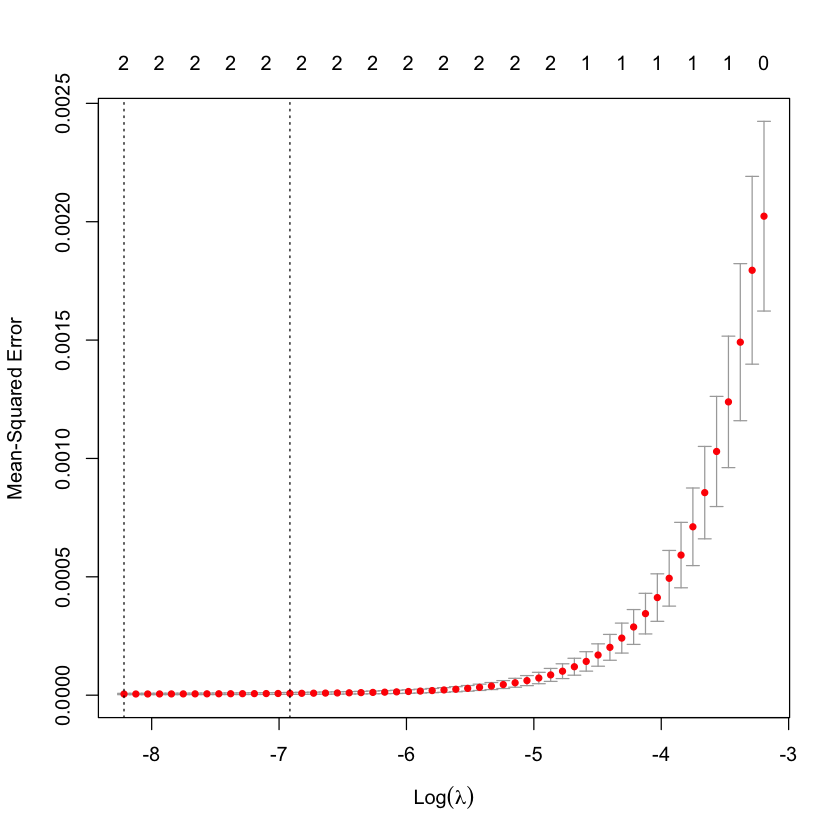

In [ ]:
X <- data.matrix(data[, c('MAE', "R_squared")])
y <- data$RMSE

lasso_model <- cv.glmnet(X, y, alpha = 1)
plot(lasso_model)